# Initialize

In [ ]:
%cd "/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLM_Parameters_Tuning"

/leonardo_scratch/fast/INF24_pmlhep_1/sgrossi0/projects/TwoSampleTest/NPLMMetrics


/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
visible_devices = [2]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py # type: ignore
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

import GMetrics # type: ignore
from GMetrics.metrics.NPLM import candidate_sigma
from GMetrics.plotters import plot_corners, cornerplotter, plot_corr_matrix, plot_corr_matrix_side_by_side # type: ignore
from GMetrics.more import MixtureDistributions # type: ignore
from GMetrics.more import deformations # type: ignore
from GMetrics.more.optimizers_deformations import compute_exclusion_bisection, compute_exclusion_bisection_np ,compute_exclusion_LR_bisection # type: ignore
from GMetrics.utils import se_mean, se_std

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "results/5D_mixture/"
if os.path.exists(results_dir):
    print("Model directory exists")
else:
    os.makedirs(results_dir)
    print("Model directory was created")
    
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-12-02 11:06:23.314251: Importing os...
2024-12-02 11:06:23.314406: Importing sys...
Visible devices: [2]
2024-12-02 11:06:23.314650: Importing timer from timeit...
2024-12-02 11:06:23.314722: Setting env variables for tf import (only device(s) [2] will be available)...
2024-12-02 11:06:23.314852: Importing numpy...
2024-12-02 11:06:23.430219: Importing matplotlib...
2024-12-02 11:06:23.777054: Importing h5py...
2024-12-02 11:06:23.807618: Importing importlib.util...
2024-12-02 11:06:23.807724: Importing json...
2024-12-02 11:06:23.807790: Importing pandas...
2024-12-02 11:06:24.225870: Importing random...
2024-12-02 11:06:24.226006: Importing scipy utils...
2024-12-02 11:06:24.698076: Importing subprocess...
2024-12-02 11:06:24.698207: Importing tensorflow...
Tensorflow version: 2.16.1
2024-12-02 11:06:28.012373: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-12-02 11:06:29.112587: Importing timeit...
2024-12-02 11:06:29.112682: Importing tqdm...
2

/leonardo_scratch/fast/INF24_pmlhep_1/envs/tf2_custom_torch2.2/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-12-02 11:06:34.690609: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #2, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
Model directory exists
2024-12-02 11:06:34.721665: All done.


# Model definition

In [3]:
seed = 0
ncomp = 3
ndims = 5
niter = 20
dist_1 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
dist_2 = MixtureDistributions.MixMultiNormal(ncomp = ncomp,
                                             ndims = ndims,
                                             loc_factor = 5.,
                                             scale_factor = 1.,
                                             dtype = tf.float64,
                                             seed = seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_1: ', dist_1.sample(2))
GMetrics.utils.reset_random_seeds(seed)
print('sample from dist_2: ', dist_2.sample(2))

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture_same_family.MixtureSameFamily'> <class 'tensorflow_probability.python.distributions.mixture_same_family.MixtureSameFamily'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)
sample from dist_1:  tf.Tensor(
[[-1.21344303  3.79128235 -0.36013196 -4.40885725 -0.9766748 ]
 [ 1.79642973  0.74689922 -1.4338443  -1.6379499   2.47373712]], shape=(2, 5), dtype=float64)
sample from dist_2:  tf.Tensor(
[[-1.21344303  3.79128235 -0.36013196 -4.40885725 -0.9766748 ]
 [ 1.79642973  0.74689922 -1.4338443  -1.6379499   2.47373712]], shape=(2, 5), dtype=float64)


# Fixed $n=m=50000$

## Null hypothesis

### Model definition

In [4]:
batch_size_test = 50000

In [5]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K_NPLM_Par/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
    
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")

Model directory exists
Null hypothesis directory exists


In [6]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = False,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Using numpy mode with TensorFlow inputs.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Generating dist_1_num and dist_2_num with tensorflow function.
Checking and setting numerical distributions.
Setting dist_num from dist_symb.


I0000 00:00:1733133996.827964 1767338 service.cc:145] XLA service 0xb9b74f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733133996.828008 1767338 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0


Setting dist_num from dist_symb.
nsamples 1000000
batch_size 50000
niter 20
niter * batch_size 1000000
small_sample True


I0000 00:00:1733134006.931519 1767338 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [7]:
flk_sigma = candidate_sigma(dist_1, perc = 90)     # you have to insert the fraction of the 90th percentile of the pairwise distribution you 
                                                   # desire by hand

Known distribution case. The distribution is the costum made MixMultiNormal.

The gaussian kernel sigma is estimated as 1/2.5 of the 90th percentile of the pairwise distance among 10000 points extracted from the reference distribution.
The value of sigma is: 3.88
The 2.5 value has been chosen looking at the pairwise distribution in 5D.
If you want you can change its value in metrics.NPLM.


In [8]:
lam_list = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11]

nplm_objects = {}

for i, lam in enumerate(lam_list):
    nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                      progress_bar = True,
                                      verbose = True,
                                      M = 3000, 
                                      lam = lam, 
                                      iter_list = 1000000,
                                      flk_sigma = flk_sigma,
                                      weight = 1)
    print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")

print(nplm_objects)
    

lam value for NPLMMetric_0 is: 1e-06
lam value for NPLMMetric_1 is: 1e-07
lam value for NPLMMetric_2 is: 1e-08
lam value for NPLMMetric_3 is: 1e-09
lam value for NPLMMetric_4 is: 1e-10
lam value for NPLMMetric_5 is: 1e-11
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f422c0b4390>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f442751a5d0>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4227f7c150>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f42313317d0>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4231265a10>, 'NPLMMetric_5': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4231332210>}


## Test Lambda Values at number of Nyström centers fixed

In [9]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"lambda_times_{test_name}.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        lam_list = [entry["lambda"] for entry in results]
        lam_list = np.array(lam_list)
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])

        for i in range(len(lam_list)):
            print(f"For test '{test_name}' and lambda = {lam_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[test_name][i]} s.")

    else:
        results = []
        metric_values[test_name] = np.zeros((len(lam_list), niter))
        null_hp_times[test_name] = np.zeros(len(lam_list))  

        for i in range(len(lam_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects[f"NPLMMetric_{i}"].Test_np()
            metric_values[test_name][i] = nplm_objects[f"NPLMMetric_{i}"].test_statistics_values
            end = timer()

            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  
            results.append({"lambda": lam_list[i], "computing_time": null_hp_times[test_name][i], "metric_list": metric_values[test_name][i].tolist()})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/lambda_times_test0.json already exists. Loading existing results for test0...
For test 'test0' and lambda = 1e-06, the null hypothesis for 20 points has been calculated in 47.20589388301596 s.
For test 'test0' and lambda = 1e-07, the null hypothesis for 20 points has been calculated in 65.84196624881588 s.
For test 'test0' and lambda = 1e-08, the null hypothesis for 20 points has been calculated in 81.83264581509866 s.
For test 'test0' and lambda = 1e-09, the null hypothesis for 20 points has been calculated in 108.55592891899869 s.
For test 'test0' and lambda = 1e-10, the null hypothesis for 20 points has been calculated in 175.43158006086014 s.
For test 'test0' and lambda = 1e-11, the null hypothesis for 20 points has been calculated in 401.7977415169589 s.


[ 2.36029469  3.29209831  4.09163229  5.42779645  8.771579   20.08988708]


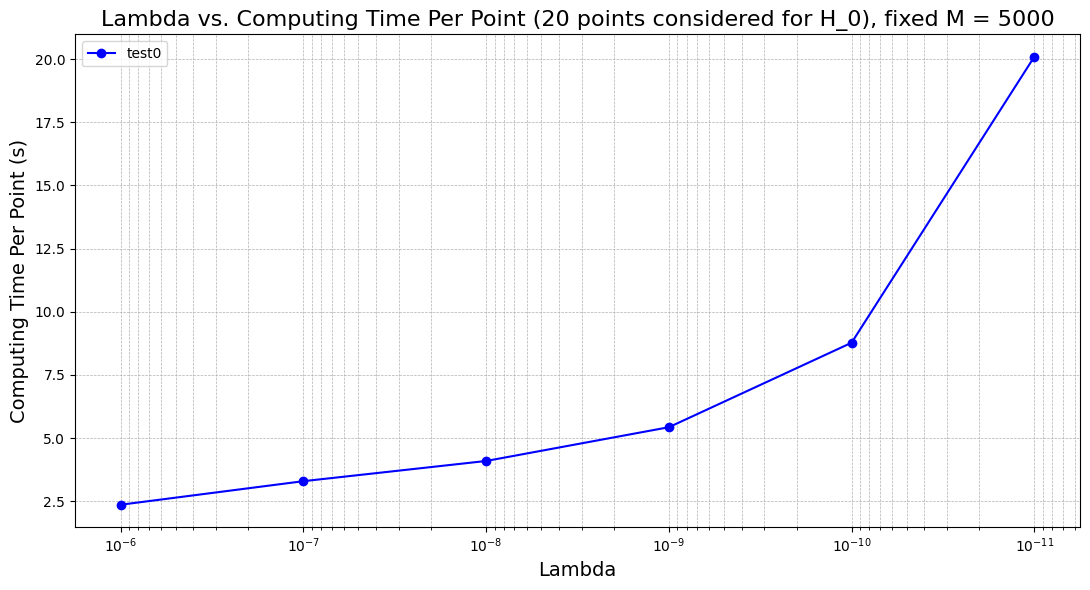

In [10]:
null_hp_times_per_point = {}
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']
color_list = ['b']
label_list = ['test0']

for test_name in test_names:
    null_hp_times_per_point[test_name] = null_hp_times[test_name]/niter
    print(null_hp_times_per_point[test_name])

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.plot(lam_list, null_hp_times_per_point[test_name], marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xscale('log')  
plt.xlabel("Lambda", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"Lambda vs. Computing Time Per Point ({niter} points considered for H_0), fixed M = 5000", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.show()


# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(lam_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xscale('log')  
# plt.xlabel("Lambda", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"Lambda vs. Average Computing Time Per Point ({niter} points considered for H_0) over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.gca().invert_xaxis()

# plt.show()

#test for different sample sizes, add test statistic values, try to test higher M values  

## Test number of Nyström centers at lambda fixed 

In [11]:
M_list = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

nplm_objects_for_M = {}

for i, M_value in enumerate(M_list):
    nplm_objects_for_M[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                            progress_bar = True,
                                            verbose = True,
                                            M = M_value, 
                                            lam = 1e-9, 
                                            iter_list = 1000000,
                                            flk_sigma = flk_sigma,
                                            weight = 1)
    print(f"M value for NPLMMetric_{i} is: {nplm_objects_for_M[f'NPLMMetric_{i}'].nplm_kwargs.get('M')}")

print(nplm_objects_for_M)
    

M value for NPLMMetric_0 is: 1000
M value for NPLMMetric_1 is: 2000
M value for NPLMMetric_2 is: 3000
M value for NPLMMetric_3 is: 4000
M value for NPLMMetric_4 is: 5000
M value for NPLMMetric_5 is: 6000
M value for NPLMMetric_6 is: 7000
M value for NPLMMetric_7 is: 8000
M value for NPLMMetric_8 is: 9000
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4227f3afd0>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f442753fbd0>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f422c0a4410>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f422c0a59d0>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f422c0a5610>, 'NPLMMetric_5': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f422c0a4dd0>, 'NPLMMetric_6': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f422c0a6850>, 'NPLMMetric_7': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4224127410>, 'NPLMMetric_8': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4231336010>}


In [12]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"M_times_{test_name}.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        M_list = [entry["M"] for entry in results]
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])
                
        for i in range(len(M_list)):
            print(f"For test '{test_name}' and M = {M_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[test_name][i]} s.")

    else:
        results = []
        metric_values[test_name] = np.zeros((len(M_list), niter))
        null_hp_times[test_name] = np.zeros(len(M_list))  

        for i in range(len(M_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects_for_M[f"NPLMMetric_{i}"].Test_np()
            metric_values[test_name][i] = nplm_objects_for_M[f"NPLMMetric_{i}"].test_statistics_values
            end = timer()

            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  # Save the time for this lambda
            results.append({"M": M_list[i], "computing_time": null_hp_times[test_name][i], "metric_list": metric_values[test_name][i].tolist()})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/M_times_test0.json already exists. Loading existing results for test0...
For test 'test0' and M = 1000, the null hypothesis for 20 points has been calculated in 196.65366441383958 s.
For test 'test0' and M = 2000, the null hypothesis for 20 points has been calculated in 133.88305560988374 s.
For test 'test0' and M = 3000, the null hypothesis for 20 points has been calculated in 103.04777381918393 s.
For test 'test0' and M = 4000, the null hypothesis for 20 points has been calculated in 88.81486314698122 s.
For test 'test0' and M = 5000, the null hypothesis for 20 points has been calculated in 89.76358047290705 s.
For test 'test0' and M = 6000, the null hypothesis for 20 points has been calculated in 92.78049580194056 s.
For test 'test0' and M = 7000, the null hypothesis for 20 points has been calculated in 96.79582607187331 s.
For test 'test0' and M = 8000, the null hypothesis for 20 points has been calculated in 100.1135620849672

[9.83268322 6.69415278 5.15238869 4.44074316 4.48817902 4.63902479
 4.8397913  5.0056781  5.35702705]


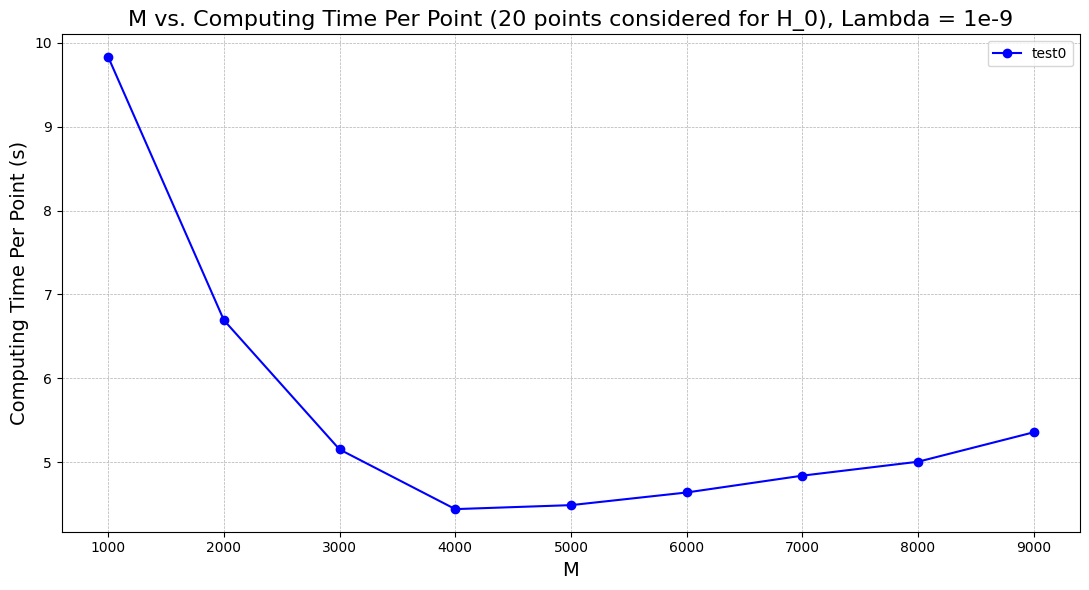

In [13]:
null_hp_times_per_point = {}
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']

color_list = ['b']
label_list = ['test0']

for test_name in test_names:
    null_hp_times_per_point[test_name] = null_hp_times[test_name]/niter
    print(null_hp_times_per_point[test_name])

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.plot(M_list, null_hp_times_per_point[test_name], marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"M vs. Computing Time Per Point ({niter} points considered for H_0), Lambda = 1e-9", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.show()


# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(M_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xlabel("M", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"M vs. Average Computing Time Per Point ({niter} points considered for H_0) for Lambda = 1e-9 over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.show()

## Test Statistic fluctuations at varying Lambda and M 

Test0 -> Average test statistic value for lambda = 1e-9 varying M: [578.4138746596229, 582.2599564618979, 583.0491555884388, 583.339672118406, 583.5144384787897, 583.6388753793387, 583.6897691694198, 583.7454792056244, 583.7824787756314]
 with std: [53.18014624995856, 52.96414599270138, 52.917287987640215, 52.895487255027554, 52.894473642511684, 52.90032371927579, 52.91226552234343, 52.91242918469038, 52.91527316052328]


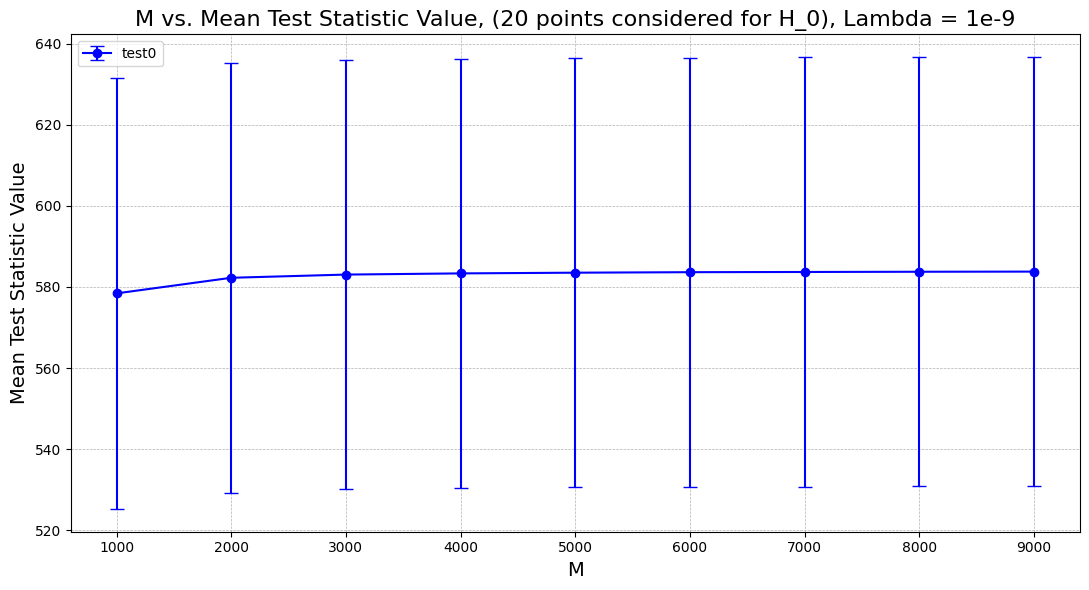

In [14]:
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']

color_list = ['b']
label_list = ['test0']

avg_test_stat = {}
std_test_stat = {}

for test_name in test_names:
    avg_test_stat[test_name] = []
    std_test_stat[test_name] = []
    for i, m in enumerate(M_list):
        avg_test_stat[test_name].append(np.mean(metric_values[test_name][i]))
        std_test_stat[test_name].append(np.std(metric_values[test_name][i]))
    print(f"{test_name.capitalize()} -> Average test statistic value for lambda = 1e-9 varying M: {avg_test_stat[test_name]}\n"
          f" with std: {std_test_stat[test_name]}")

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.errorbar(M_list, avg_test_stat[test_name], std_test_stat[test_name], capsize=5 ,marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Mean Test Statistic Value", fontsize=14)
plt.title(f"M vs. Mean Test Statistic Value, ({niter} points considered for H_0), Lambda = 1e-9", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.show()


# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(M_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xlabel("M", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"M vs. Average Computing Time Per Point ({niter} points considered for H_0) for Lambda = 1e-9 over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.show()


## Final Test to choose parameters 

In [15]:
M_threshold_1 = 9*1e8/(ndims*batch_size_test)  
M_threshold_2 = 9*1e8/(ndims*batch_size_test*2)  
print(M_threshold_1, M_threshold_2)

# Ci sarà il *2, non ci sarà il *2? Chissà

3600.0 1800.0


To understand what happens with the times at varying M numbers look at the documentation: https://falkonml.github.io/falkon/api_reference/options.html#falkon.options.FalkonOptions, search for min_cuda_iter_size_64 (if you are working with float 64. If instead you worlk with float 32 search min_cuda_iter_size_32). 

Given that we are working with float 64 we have that:
if     M x ndims x sample_size(*2?) < 9 x 10^8, the computation will run on the CPU, otherwise it will use GPU. 
That's why you see sometimes the times being higher at lower M numbers, arrive to a minimum and then growing again: you pass from CPU to GPU. 
The idea is to fix the M_value around the minimum (a bit on the right side of it to have better precision but mantain good computational time performance) 
and vary lambda to see where it starts growing drastically. 

## Testing Lambda with optimal M


M = 6000

In [16]:
lam_list = [1e-6, 1e-7, 1e-8, 1e-9]

nplm_objects = {}

for i, lam in enumerate(lam_list):
    nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                      progress_bar = True,
                                      verbose = True,
                                      M = 6000, 
                                      lam = lam, 
                                      iter_list = 1000000,
                                      flk_sigma = flk_sigma,
                                      weight = 1)
    print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")

print(nplm_objects)
    

lam value for NPLMMetric_0 is: 1e-06
lam value for NPLMMetric_1 is: 1e-07
lam value for NPLMMetric_2 is: 1e-08
lam value for NPLMMetric_3 is: 1e-09
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4227f09a90>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4227ff81d0>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4231264310>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4231332210>}


In [18]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"lambda_times_at_M_6000_{test_name}.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        lam_list = [entry["lambda"] for entry in results]
        lam_list = np.array(lam_list)
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])

        for i in range(len(lam_list)):
            print(f"For test '{test_name}' and lambda = {lam_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[test_name][i]} s.")

    else:
        results = []
        metric_values[test_name] = np.zeros((len(lam_list), niter))
        null_hp_times[test_name] = np.zeros(len(lam_list))  

        for i in range(len(lam_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects[f"NPLMMetric_{i}"].Test_np()
            metric_values[test_name][i] = nplm_objects[f"NPLMMetric_{i}"].test_statistics_values
            end = timer()

            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  
            results.append({"lambda": lam_list[i], "computing_time": null_hp_times[test_name][i], "metric_list": metric_values[test_name][i].tolist()})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/lambda_times_at_M_6000_test0.json already exists. Loading existing results for test0...
For test 'test0' and lambda = 1e-06, the null hypothesis for 20 points has been calculated in 27.947389329085127 s.
For test 'test0' and lambda = 1e-07, the null hypothesis for 20 points has been calculated in 30.092058091191575 s.
For test 'test0' and lambda = 1e-08, the null hypothesis for 20 points has been calculated in 39.110379606019706 s.
For test 'test0' and lambda = 1e-09, the null hypothesis for 20 points has been calculated in 55.88497007009573 s.


[1.39736947 1.5046029  1.95551898 2.7942485 ]


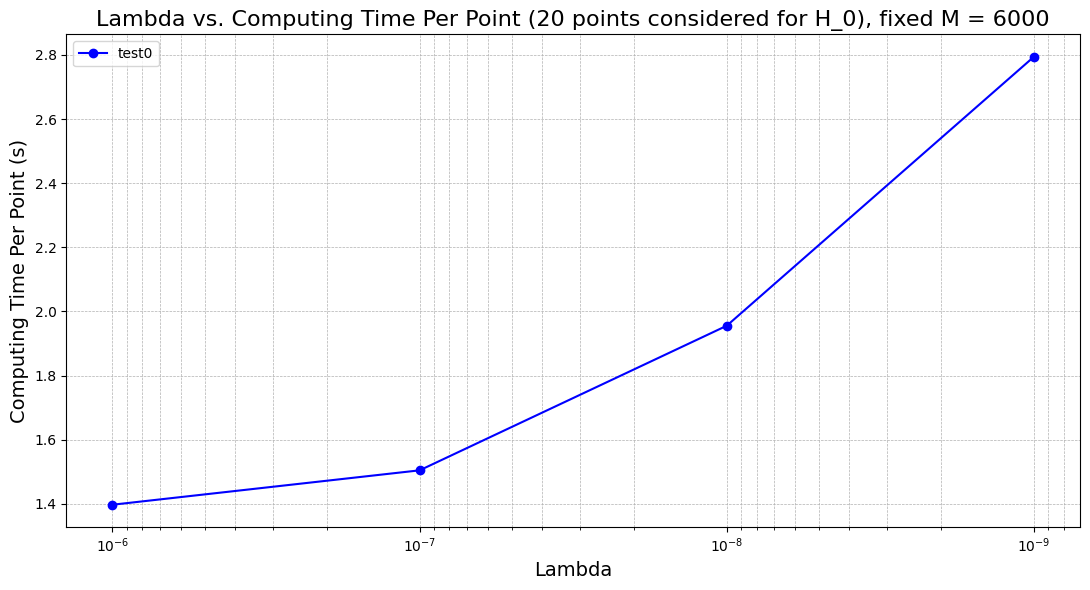

In [19]:
null_hp_times_per_point = {}
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']
color_list = ['b']
label_list = ['test0']

for test_name in test_names:
    null_hp_times_per_point[test_name] = null_hp_times[test_name]/niter
    print(null_hp_times_per_point[test_name])

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.plot(lam_list, null_hp_times_per_point[test_name], marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xscale('log')  
plt.xlabel("Lambda", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"Lambda vs. Computing Time Per Point ({niter} points considered for H_0), fixed M = 6000", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.show()


# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(lam_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xscale('log')  
# plt.xlabel("Lambda", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"Lambda vs. Average Computing Time Per Point ({niter} points considered for H_0) over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.gca().invert_xaxis()

# plt.show()

#test for different sample sizes, add test statistic values, try to test higher M values  

M = 7000

In [20]:
lam_list = [1e-6, 1e-7, 1e-8, 1e-9]

nplm_objects = {}

for i, lam in enumerate(lam_list):
    nplm_objects[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                      progress_bar = True,
                                      verbose = True,
                                      M = 7000, 
                                      lam = lam, 
                                      iter_list = 1000000,
                                      flk_sigma = flk_sigma,
                                      weight = 1)
    print(f"lam value for NPLMMetric_{i} is: {nplm_objects[f'NPLMMetric_{i}'].nplm_kwargs.get('lam')}")

print(nplm_objects)
    

lam value for NPLMMetric_0 is: 1e-06
lam value for NPLMMetric_1 is: 1e-07
lam value for NPLMMetric_2 is: 1e-08
lam value for NPLMMetric_3 is: 1e-09
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f442751a5d0>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4427501050>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4227ff9850>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f42312669d0>}


In [22]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"lambda_times_at_M_7000_{test_name}.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        lam_list = [entry["lambda"] for entry in results]
        lam_list = np.array(lam_list)
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])

        for i in range(len(lam_list)):
            print(f"For test '{test_name}' and lambda = {lam_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[test_name][i]} s.")

    else:
        results = []
        metric_values[test_name] = np.zeros((len(lam_list), niter))
        null_hp_times[test_name] = np.zeros(len(lam_list))  

        for i in range(len(lam_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects[f"NPLMMetric_{i}"].Test_np()
            metric_values[test_name][i] = nplm_objects[f"NPLMMetric_{i}"].test_statistics_values
            end = timer()

            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  
            results.append({"lambda": lam_list[i], "computing_time": null_hp_times[test_name][i], "metric_list": metric_values[test_name][i].tolist()})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/lambda_times_at_M_7000_test0.json already exists. Loading existing results for test0...
For test 'test0' and lambda = 1e-06, the null hypothesis for 20 points has been calculated in 31.177055818028748 s.
For test 'test0' and lambda = 1e-07, the null hypothesis for 20 points has been calculated in 35.56912958994508 s.
For test 'test0' and lambda = 1e-08, the null hypothesis for 20 points has been calculated in 44.50703152292408 s.
For test 'test0' and lambda = 1e-09, the null hypothesis for 20 points has been calculated in 65.38036974705756 s.


[1.55885279 1.77845648 2.22535158 3.26901849]


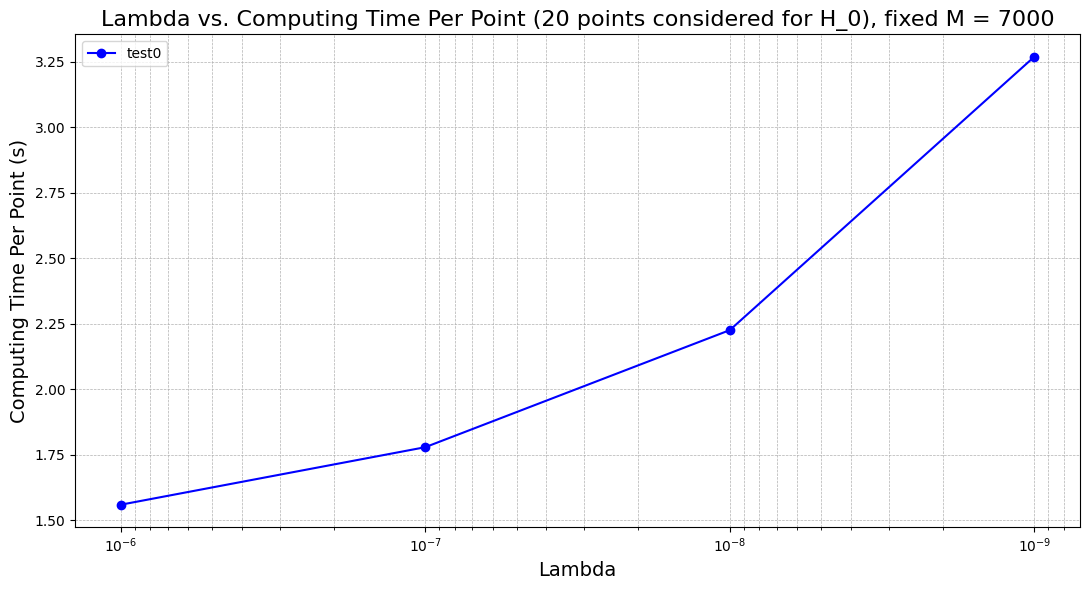

In [23]:
null_hp_times_per_point = {}
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']
color_list = ['b']
label_list = ['test0']

for test_name in test_names:
    null_hp_times_per_point[test_name] = null_hp_times[test_name]/niter
    print(null_hp_times_per_point[test_name])

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.plot(lam_list, null_hp_times_per_point[test_name], marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xscale('log')  
plt.xlabel("Lambda", fontsize=14)
plt.ylabel("Computing Time Per Point (s)", fontsize=14)
plt.title(f"Lambda vs. Computing Time Per Point ({niter} points considered for H_0), fixed M = 7000", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.gca().invert_xaxis()

plt.show()


# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(lam_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xscale('log')  
# plt.xlabel("Lambda", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"Lambda vs. Average Computing Time Per Point ({niter} points considered for H_0) over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.gca().invert_xaxis()

# plt.show()

#test for different sample sizes, add test statistic values, try to test higher M values  

## Check stability of the test statistic for the optimal lambda and varying M around the chosen M

In [24]:
M_list = [4000, 6000, 7000, 9000, 11000]

nplm_objects_for_M = {}

for i, M_value in enumerate(M_list):
    nplm_objects_for_M[f"NPLMMetric_{i}"] = GMetrics.NPLMMetric(TwoSampleTestInputs,
                                            progress_bar = True,
                                            verbose = True,
                                            M = M_value, 
                                            lam = 1e-7, 
                                            iter_list = 1000000,
                                            flk_sigma = flk_sigma,
                                            weight = 1)
    print(f"M value for NPLMMetric_{i} is: {nplm_objects_for_M[f'NPLMMetric_{i}'].nplm_kwargs.get('M')}")

print(nplm_objects_for_M)

M value for NPLMMetric_0 is: 4000
M value for NPLMMetric_1 is: 6000
M value for NPLMMetric_2 is: 7000
M value for NPLMMetric_3 is: 9000
M value for NPLMMetric_4 is: 11000
{'NPLMMetric_0': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f41f409d2d0>, 'NPLMMetric_1': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f422409b9d0>, 'NPLMMetric_2': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f4231331010>, 'NPLMMetric_3': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f442753fbd0>, 'NPLMMetric_4': <GMetrics.metrics.NPLM.NPLMMetric object at 0x7f422c0a5e50>}


In [26]:
# test_names = ["test0", "test1", "test2", "test3"]
test_names = ["test0"]
name = "nplm"
null_hp_times = {}
metric_values = {}

for test_name in test_names:
    file = null_hypotheses_dir + f"test_stat_opt_lambda.json"

    if os.path.exists(file):
        print(f"File {file} already exists. Loading existing results for {test_name}...")
        with open(file, "r") as f:
            results = json.load(f)
        M_list = [entry["M"] for entry in results]
        null_hp_times[test_name] = [entry["computing_time"] for entry in results]
        null_hp_times[test_name] = np.array(null_hp_times[test_name])
        metric_values[test_name] = [entry["metric_list"] for entry in results]
        metric_values[test_name] = np.array(metric_values[test_name])
                
        for i in range(len(M_list)):
            print(f"For test '{test_name}' and M = {M_list[i]}, the null hypothesis for {niter} points has been calculated in {null_hp_times[test_name][i]} s.")

    else:
        results = []
        metric_values[test_name] = np.zeros((len(M_list), niter))
        null_hp_times[test_name] = np.zeros(len(M_list))  

        for i in range(len(M_list)):
            start = timer()
            print(f"Computing and saving {name}")
            nplm_objects_for_M[f"NPLMMetric_{i}"].Test_np()
            metric_values[test_name][i] = nplm_objects_for_M[f"NPLMMetric_{i}"].test_statistics_values
            end = timer()

            print(f"All done in: {end - start:.2f} s.")
            null_hp_times[test_name][i] = end - start  # Save the time for this lambda
            results.append({"M": M_list[i], "computing_time": null_hp_times[test_name][i], "metric_list": metric_values[test_name][i].tolist()})

        with open(file, "w") as file:
            json.dump(results, file, indent=4)

File results/5D_mixture/5D_50K_NPLM_Par/null_hypothesis/test_stat_opt_lambda.json already exists. Loading existing results for test0...
For test 'test0' and M = 4000, the null hypothesis for 20 points has been calculated in 21.262760866899043 s.
For test 'test0' and M = 6000, the null hypothesis for 20 points has been calculated in 30.115187134128064 s.
For test 'test0' and M = 7000, the null hypothesis for 20 points has been calculated in 34.82025060406886 s.
For test 'test0' and M = 9000, the null hypothesis for 20 points has been calculated in 47.470338304992765 s.
For test 'test0' and M = 11000, the null hypothesis for 20 points has been calculated in 63.13863766612485 s.


Test0 -> Average test statistic value for lambda = 1e-7 varying M: [254.23579982480047, 254.24604158144598, 254.23553435789526, 254.2359673076407, 254.2738479343477]
 with std: [27.792033453474318, 27.78971547420237, 27.78484547244696, 27.778909022623857, 27.77738506736949]


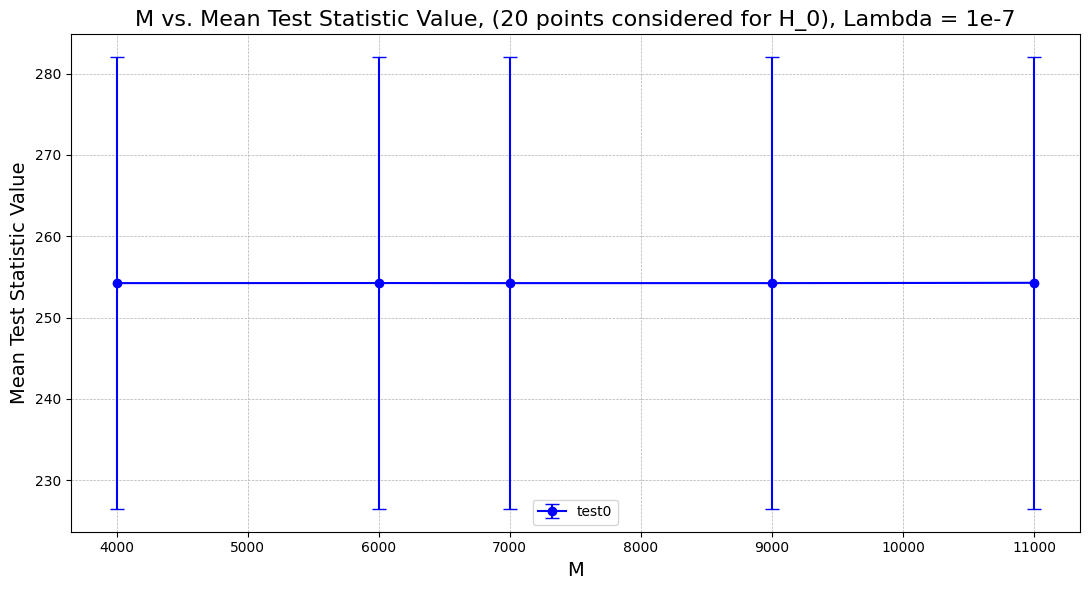

In [27]:
# color_list = ['b', 'r', 'g', 'y']
# label_list = ['test0', 'test1', 'test2', 'test3']

color_list = ['b']
label_list = ['test0']

avg_test_stat = {}
std_test_stat = {}

for test_name in test_names:
    avg_test_stat[test_name] = []
    std_test_stat[test_name] = []
    for i, m in enumerate(M_list):
        avg_test_stat[test_name].append(np.mean(metric_values[test_name][i]))
        std_test_stat[test_name].append(np.std(metric_values[test_name][i]))
    print(f"{test_name.capitalize()} -> Average test statistic value for lambda = 1e-7 varying M: {avg_test_stat[test_name]}\n"
          f" with std: {std_test_stat[test_name]}")

plt.figure(figsize=(11, 6))
for i, test_name in enumerate(test_names):
    plt.errorbar(M_list, avg_test_stat[test_name], std_test_stat[test_name], capsize=5 ,marker='o', linestyle='-', color = color_list[i], label = label_list[i])

plt.xlabel("M", fontsize=14)
plt.ylabel("Mean Test Statistic Value", fontsize=14)
plt.title(f"M vs. Mean Test Statistic Value, ({niter} points considered for H_0), Lambda = 1e-7", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.legend()

plt.show()


# mean_time_per_point = sum(null_hp_times_per_point[test_name] for test_name in test_names)/len(test_names) 
# print(mean_time_per_point)

# plt.figure(figsize=(11, 6))
# plt.plot(M_list, mean_time_per_point, marker='o', linestyle='-', color = 'b', label = 'mean time')

# plt.xlabel("M", fontsize=14)
# plt.ylabel("Average Computing Time Per Point (s)", fontsize=14)
# plt.title(f"M vs. Average Computing Time Per Point ({niter} points considered for H_0) for Lambda = 1e-9 over 4 tests", fontsize=16)
# plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.tight_layout()
# plt.legend()

# plt.show()
